In [266]:
import pandas as pd
import numpy as np
import pprint

In [267]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import os
import pydotplus

In [317]:
dt_df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot_english.csv")

In [318]:
dt_df_ = dt_df.drop('Unnamed: 0', axis=1)

In [319]:
dt_df__ = dt_df_.drop(['college_gongwa', 'college_gigyeong', 'college_energybio', 'college_inmun', 'college_jeongtong',
                       'college_art'], axis=1)

In [320]:
dt_df__

,major_based_practice,major_practice_theory_balanced,major_based_theory,want_job_RandD,want_job_technical,want_job_office,want_job_produce,want_job_sales,want_job_manager,want_job_culture,...,have_RA_program_or_not,people_around_you_doing_RA,RA_activity_or_not,intern_or_not,sincerity_about_undergraduate_studying,lack_of_money,saw_promotion_of_graduate_school,master_degree_help_get_job,satisfied_with_major,plan_to_enter_graduate_school
0,0,1,0,3,3,3,3,3,3,3,...,1,1,0,0,3,3,0,3,3,0
1,0,1,0,2,4,4,3,4,4,4,...,0,1,0,0,3,3,1,4,4,1
2,0,1,0,3,4,5,3,4,4,4,...,1,1,1,1,3,2,0,3,3,0
3,1,0,0,4,4,5,3,1,4,5,...,0,0,0,0,4,4,0,1,5,1
4,0,0,1,3,4,1,4,3,4,3,...,1,1,0,1,4,2,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,1,0,0,5,2,3,2,3,5,3,...,0,0,0,0,4,2,0,4,5,0
978,0,0,1,4,4,2,2,2,4,4,...,0,0,0,0,3,2,0,4,4,1
979,0,1,0,4,4,4,3,2,4,5,...,0,0,0,1,3,2,0,4,4,1
980,0,1,0,5,4,4,1,1,1,5,...,0,0,0,1,4,3,0,3,3,1


In [469]:
# X, y 분리, y='석사진학계획'
X = dt_df__.loc[:, dt_df__.columns != 'plan_to_enter_graduate_school']
y = dt_df__['plan_to_enter_graduate_school']

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [471]:
feature_names = dt_df__.columns.tolist()

In [472]:
len(feature_names)

37

In [473]:
feature_names.remove('plan_to_enter_graduate_school')

In [474]:
len(feature_names)

36

In [475]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_train, y_train,len(feature_names))
print(str(len(cor_feature)), 'selected features')

36 selected features


In [485]:
corrcoef_list={}
for i in X.columns.tolist():
    coef=np.corrcoef(X_train[i], y_train)[0, 1]
    corrcoef_list[str(i)]=np.abs(coef)
print(corrcoef_list)

{'major_based_practice': 0.03544786799812099, 'major_practice_theory_balanced': 0.058631712240485405, 'major_based_theory': 0.0890373749335262, 'want_job_RandD': 0.3768532493951571, 'want_job_technical': 0.09019807753208149, 'want_job_office': 0.08704022043906517, 'want_job_produce': 0.034424984870084545, 'want_job_sales': 0.08964647094722931, 'want_job_manager': 0.03621058968184721, 'want_job_culture': 0.04511911753114139, 'need_master_degree_for_dreamjob': 0.4153358971668658, 'think_bad_about_graduate_school_by_myself': 0.11698230608435733, 'think_bad_about_graduate_school_by_around': 0.0074653502194053905, 'bad_graduate_school_because of_tuition': 0.05151605380677652, 'bad_graduate_school_because of_research': 0.13940839801133206, 'bad_graduate_school_because of_project': 0.1393867584701066, 'bad_graduate_school_because of_personal_time': 0.08578362577276999, 'bad_graduate_school_because of_impersonal': 0.04027028626956454, 'bad_graduate_school_because of_professor_personal_task': 0

In [494]:
pearson_df=pd.DataFrame({'Feature':corrcoef_list.keys(), 'Pearson':corrcoef_list.values()})
pearson_df=pearson_df.sort_values(['Pearson', 'Feature'], ascending=False)
pearson_df.index = range(1, len(pearson_df)+1)

In [495]:
pearson_df

,Feature,Pearson
1,need_master_degree_for_dreamjob,0.415336
2,want_job_RandD,0.376853
3,RA_activity_or_not,0.195124
4,satisfied_with_major,0.193802
5,master_degree_help_get_job,0.185879
6,advice_by_professor,0.185198
7,bad_graduate_school_because of_research,0.139408
8,bad_graduate_school_because of_project,0.139387
9,people_around_you_doing_RA,0.118352
10,think_bad_about_graduate_school_by_myself,0.116982


In [461]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1, random_state=0), threshold='median', max_features=len(feature_names))
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

18 selected features


In [462]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40, num_boost_round=1000)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='median', max_features=len(feature_names))
embeded_lgb_selector.fit(X_train, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

18 selected features


C:\Users\Woojin\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [463]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_names, 'Pearson':cor_support,
                                     'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(feature_names))

,Feature,Pearson,Random Forest,LightGBM,Total
1,want_job_sales,True,True,True,3
2,want_job_office,True,True,True,3
3,want_job_culture,True,True,True,3
4,want_job_RandD,True,True,True,3
5,think_bad_about_graduate_school_by_myself,True,True,True,3
6,sincerity_about_undergraduate_studying,True,True,True,3
7,satisfied_with_major,True,True,True,3
8,satisfied_with_lecture,True,True,True,3
9,satisfied_with_curriculum,True,True,True,3
10,need_master_degree_for_dreamjob,True,True,True,3


In [439]:
# X, y 분리, y='석사진학계획'
X = np.array(dt_df__.loc[:, dt_df__.columns != 'plan_to_enter_graduate_school'])
y = np.array(dt_df__['plan_to_enter_graduate_school'])

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

major_based_practice = 0.00536610213702682
major_practice_theory_balanced = 0.005542488887226959
major_based_theory = 0.004910869052305587
want_job_RandD = 0.1656303107108234
want_job_technical = 0.01517964714346131
want_job_office = 0.03382538860195965
want_job_produce = 0.015524364819623574
want_job_sales = 0.022099628392346225
want_job_manager = 0.02043883580173906
want_job_culture = 0.023904119415469226
need_master_degree_for_dreamjob = 0.24083375681071525
think_bad_about_graduate_school_by_myself = 0.03618222317548334
think_bad_about_graduate_school_by_around = 0.01599945667736169
bad_graduate_school_because of_tuition = 0.02663723979692811
bad_graduate_school_because of_research = 0.01416103727006109
bad_graduate_school_because of_project = 0.02173060414314701
bad_graduate_school_because of_personal_time = 0.013818792497949465
bad_graduate_school_because of_impersonal = 0.010997996096661833
bad_graduate_school_because of_professor_personal_task = 0.015360267612948095
bad_graduate

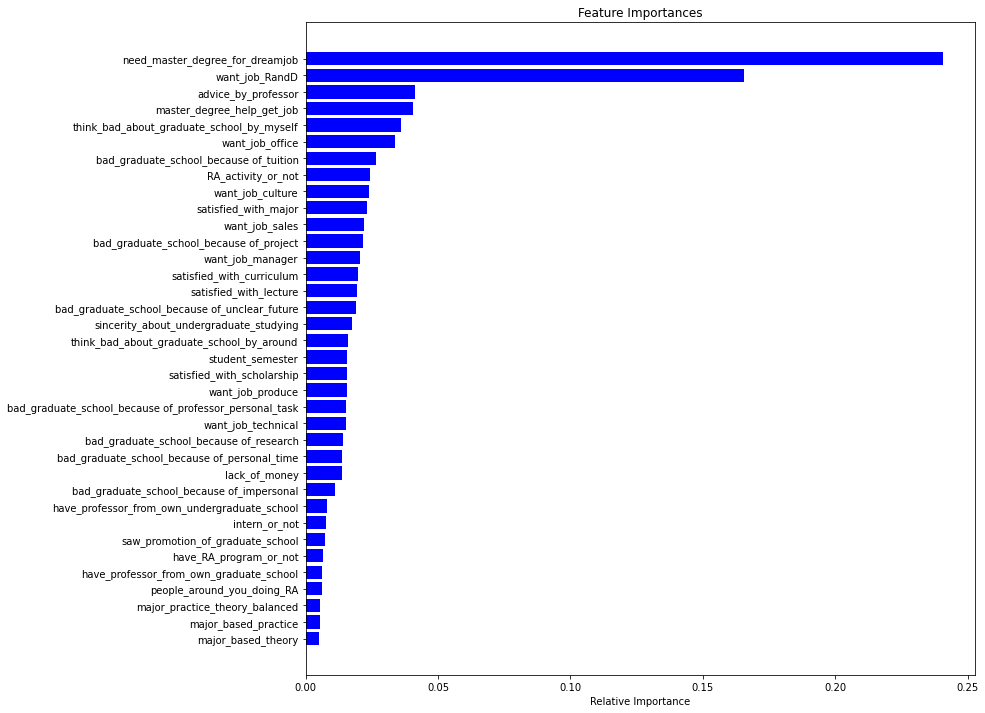

In [466]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)
for name, importance in zip(feature_names, rnd_clf.feature_importances_):
    print(name, "=", importance)

features = feature_names
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [497]:
rf_fi_df=pd.DataFrame(rnd_clf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)
rf_fi_df

,importance
need_master_degree_for_dreamjob,0.240834
want_job_RandD,0.165630
advice_by_professor,0.041510
master_degree_help_get_job,0.040416
think_bad_about_graduate_school_by_myself,0.036182
want_job_office,0.033825
bad_graduate_school_because of_tuition,0.026637
RA_activity_or_not,0.024343
want_job_culture,0.023904
satisfied_with_major,0.023133


C:\Users\Woojin\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


major_based_practice = 0
major_practice_theory_balanced = 0
major_based_theory = 1
want_job_RandD = 95
want_job_technical = 6
want_job_office = 39
want_job_produce = 49
want_job_sales = 56
want_job_manager = 0
want_job_culture = 45
need_master_degree_for_dreamjob = 79
think_bad_about_graduate_school_by_myself = 75
think_bad_about_graduate_school_by_around = 1
bad_graduate_school_because of_tuition = 86
bad_graduate_school_because of_research = 48
bad_graduate_school_because of_project = 6
bad_graduate_school_because of_personal_time = 0
bad_graduate_school_because of_impersonal = 1
bad_graduate_school_because of_professor_personal_task = 2
bad_graduate_school_because of_unclear_future = 0
satisfied_with_lecture = 9
advice_by_professor = 95
satisfied_with_scholarship = 0
satisfied_with_curriculum = 9
have_professor_from_own_graduate_school = 0
have_professor_from_own_undergraduate_school = 0
student_semester = 104
have_RA_program_or_not = 1
people_around_you_doing_RA = 3
RA_activity_or_

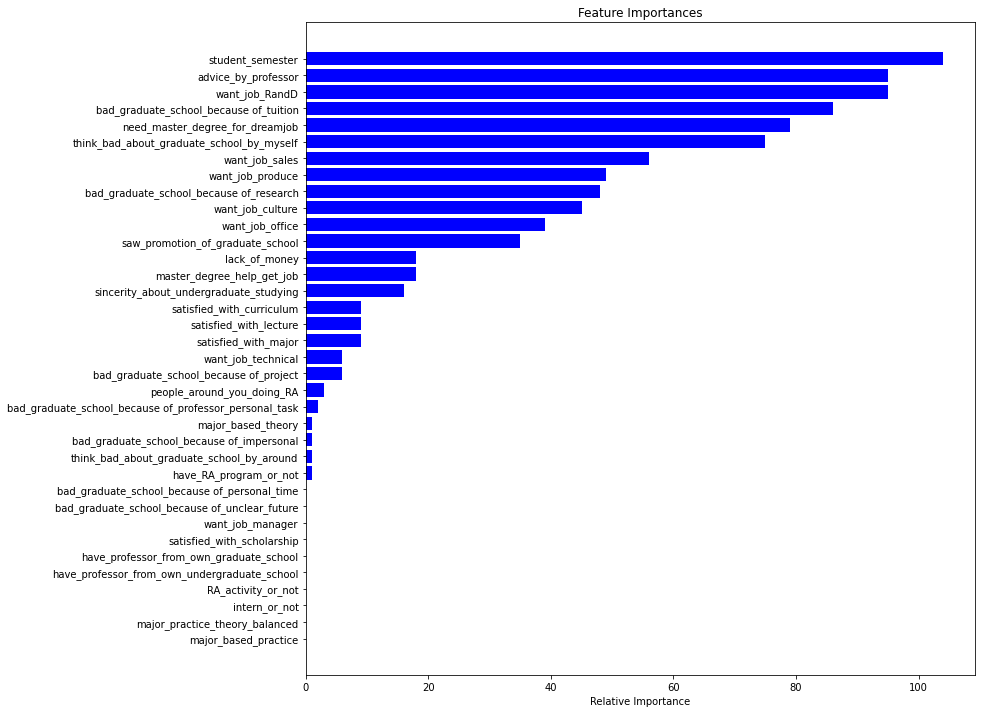

In [467]:
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier(class_weight='balanced', n_estimators=1000, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40, num_boost_round=1000)
lgbc.fit(X_train, y_train)
for name, importance in zip(feature_names, lgbc.feature_importances_):
    print(name, "=", importance)



features = feature_names
importances = lgbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [498]:
lgbc_fi_df=pd.DataFrame(lgbc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)
lgbc_fi_df

,importance
student_semester,104
want_job_RandD,95
advice_by_professor,95
bad_graduate_school_because of_tuition,86
need_master_degree_for_dreamjob,79
think_bad_about_graduate_school_by_myself,75
want_job_sales,56
want_job_produce,49
bad_graduate_school_because of_research,48
want_job_culture,45
